- 시계열 개념
    - 종단면 데이터, 횡단면 데이터
    - 단변량 시계열, 다변량 시계열
    - 시간의존성, 계절성, 추세,  자기상관성
    - 추세 요인, 계절 요인, 순환요인, 불규칙 요인
- 시계열 전처리
    - 결측치 처리-보간법
    - 이상치 탐지
    - 평활화(smoothing)-이동평균
    - 요소분해
- 정상성
    - 정상성의 정의
    - 강한 정상성과 약한 정상성
    - 단위근의 시계열적 의미
    - 단위근 검정
    - 확정적 추세와 확률적 추세
    - 정상성 확보 방법

# 판다스 사전과제
- Pandas에서 날짜 데이터 다루기
1. datetime 객체와 활용
datetime 클래스는 날짜와 시간을 저장하며, 현재 시간 반환(.now()) 및 연/월/일/시/분/초 등 개별 요소 추출(.year, .month 등)이 가능.

주요 메서드:

.weekday(): 요일 반환 (0: 월요일 ~ 6: 일요일).

.date(), .time(): 날짜 부분 또는 시간 부분만 반환.

문자열 ↔ datetime 변환:

.strftime(): datetime 객체를 지정된 형식의 문자열로 출력.

.strptime(): 지정된 형식의 문자열을 datetime 객체로 변환.

형식 자동 인식: dateutil.parser의 parse()를 사용하면 형식을 지정하지 않아도 문자열을 datetime 객체로 변환 가능.

2. 날짜 연산: datetime과 timedelta
datetime 객체 간의 뺄셈은 가능하며, 그 결과는 두 날짜 사이의 시간 간격을 나타내는 timedelta 객체로 반환. datetime 객체는 timedelta 객체와 덧셈/뺄셈 연산이 가능하지만, datetime 객체끼리의 덧셈은 불가능.

3. 시계열 변화량 계산: .diff()
diff() 메서드는 시계열 데이터에서 현재 시점과 이전 시점 간의 차이, 즉 변화량(차분)을 계산.

목적: 추세를 제거하고 데이터의 정상성을 확보하여 패턴을 단순화하는 데 사용.

특징: 첫 번째 값은 비교 대상이 없어 NaN이 되므로 후처리가 필요하며, .diff(n) 형태로 n개 전 시점과의 차이를 구할 수도 있음.


> # 1. 시계열 개념

>>## (1) 시계열 정의
- 시계열 데이터는 순차적인 시간의 흐름에 따라 수집된 데이터로, 연속된 관측치 간에 상관관계가 존재하며 순서가 중요한 시퀀스 데이터로 간주된다. 핵심은 '과거 데이터가 미래에 어떤 영향을 미치는가?
종단면 데이터와 횡단면 데이터
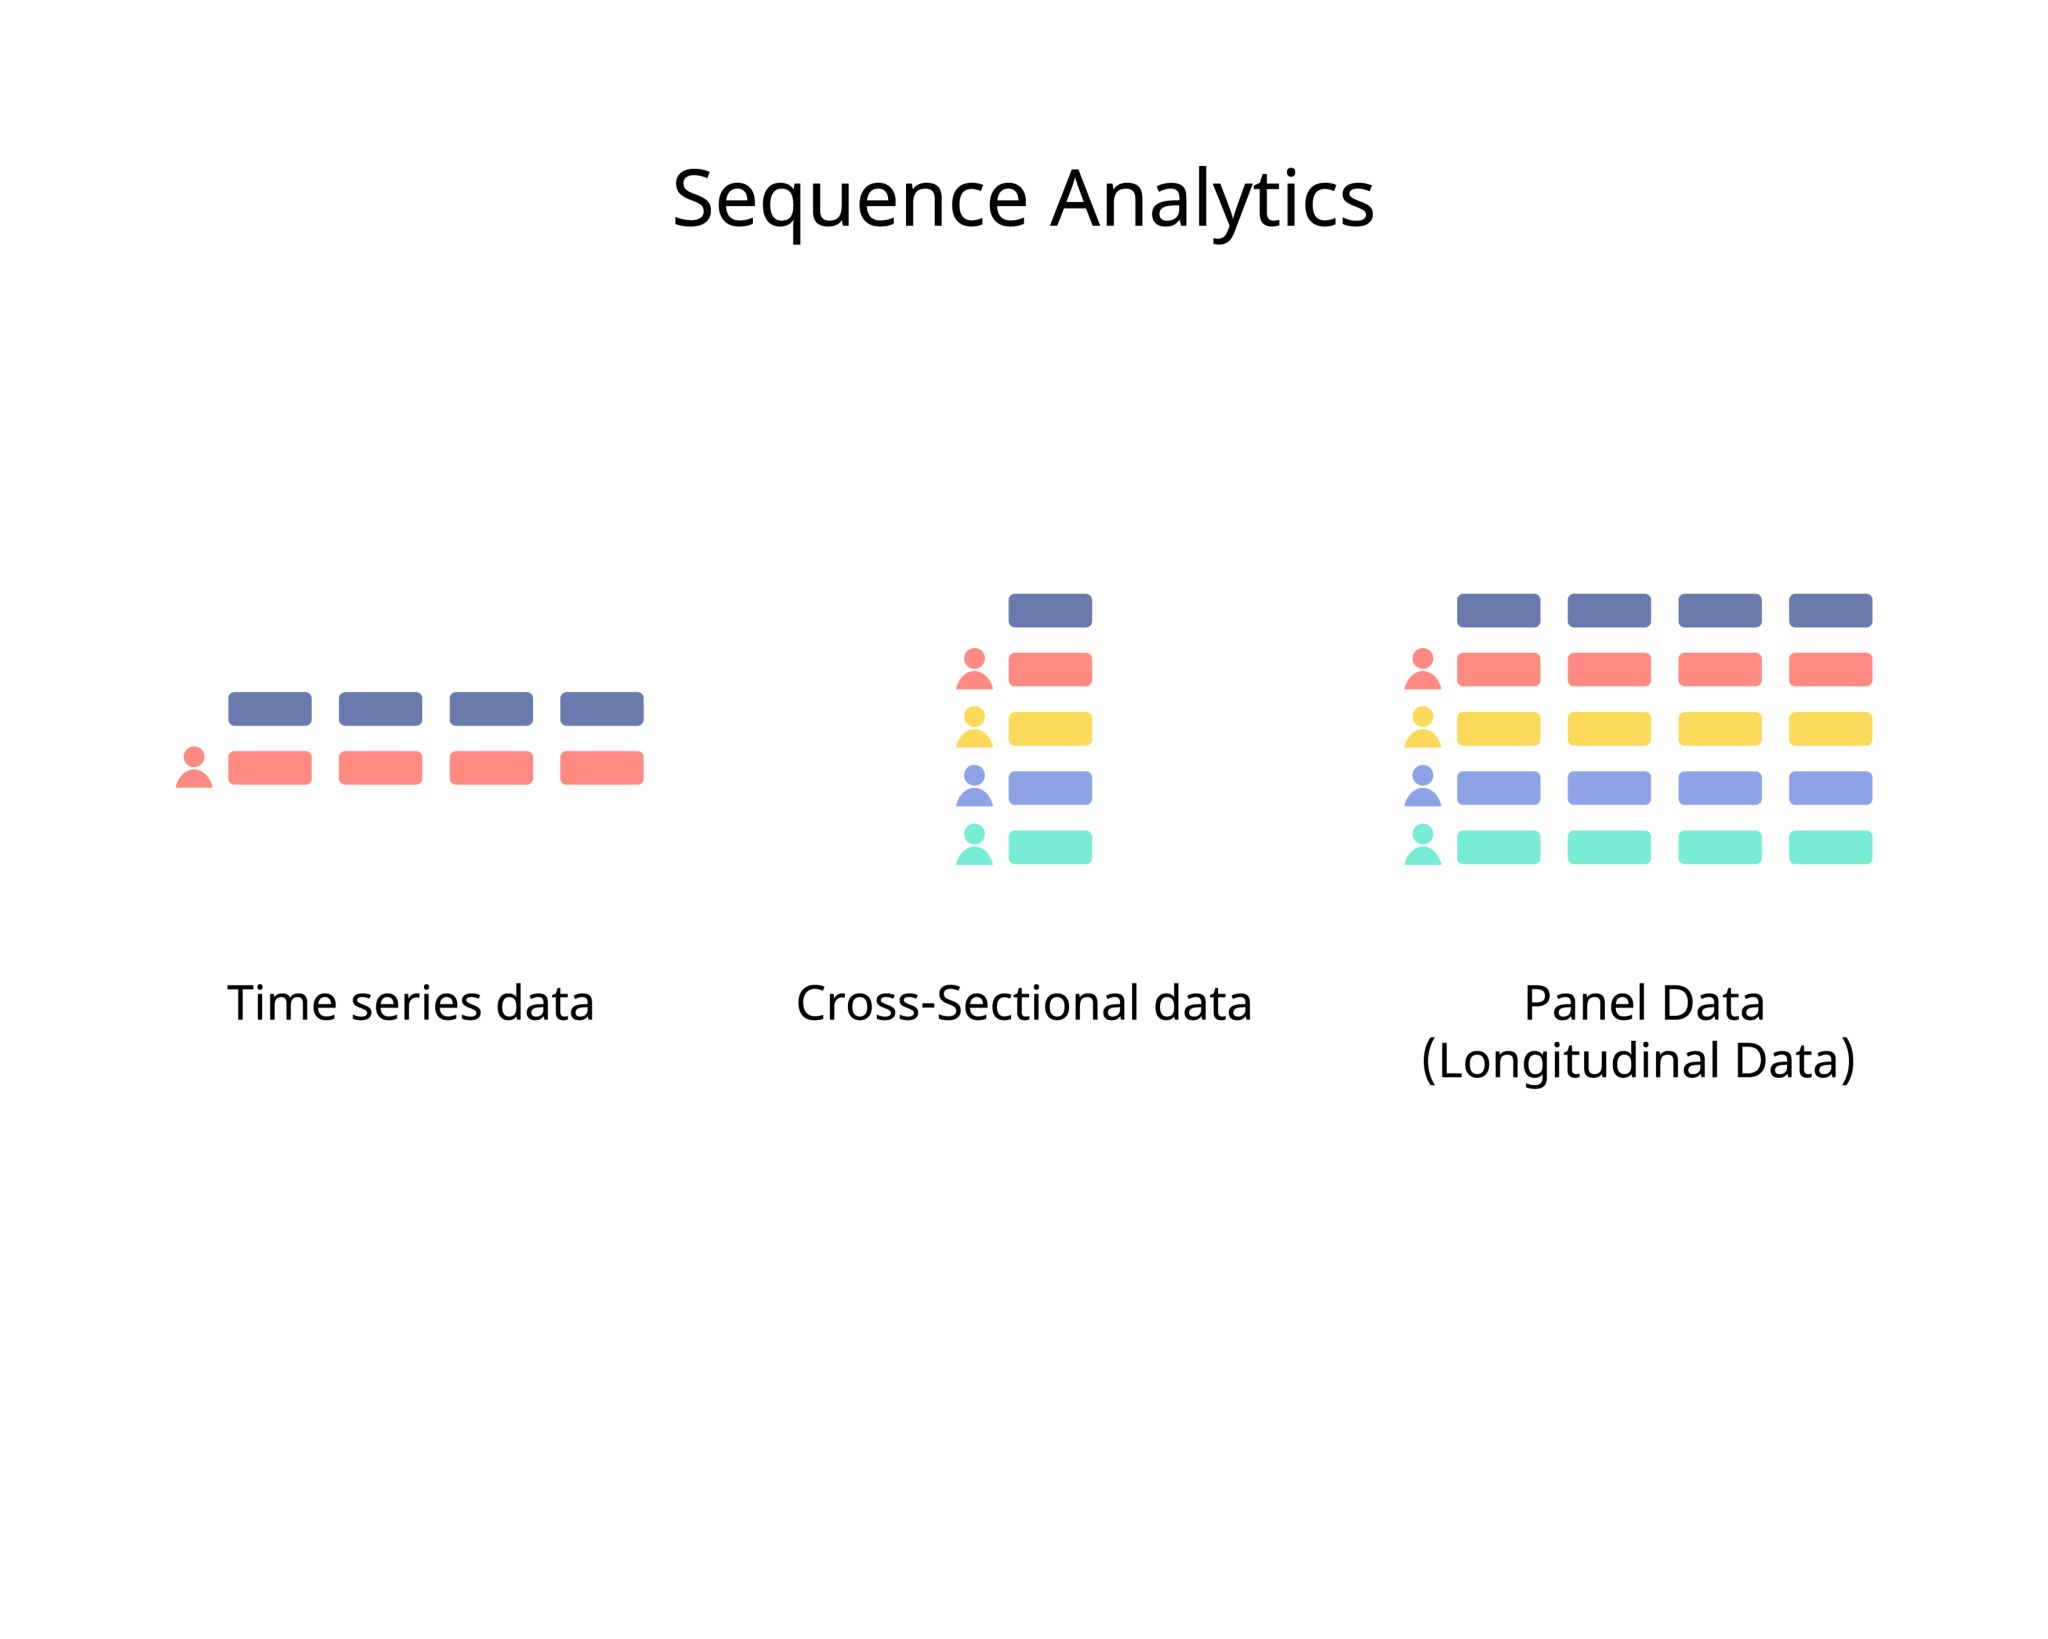

- 종단면 (시계열) 데이터: 동일한 개체에 대해 특정 시간 간격으로 반복 수집된 데이터. 시간 의존성을 가지며 개체의 변화 추적 및 패턴 분석에 주로 사용됨.

- 횡단면 (비시계열) 데이터: 몇 가지 주제에 대해 특정 시점에서 수집된 데이터. 시간 의존성이 없으며 개체/단위 간의 비교 분석에 주로 사용.

- 단변량 시계열과 다변량 시계열
- 단변량 시계열: 시간에 따라 측정된 단일 변수로 이루어진 데이터 (예: 주식 가격, 온도 기록). 시간 흐름에 따른 자기 패턴 이해가 목적.

- 다변량 시계열: 같은 시간에 기록된 둘 이상의 변수로 이루어진 데이터 (예: 경제 지표, 기후 모델). 변수 간의 상호 작용 및 영향력 파악이 목적.

>>## (2) 분석 요인

- 시계열 데이터는 다음 네 가지 요인의 결합으로 분석됩니다.

1. 추세 요인: 시간에 따라 지속적으로 증가/감소하는 장기적인 경향.

2. 계절 요인: 일정한 주기(주, 월, 년 등)로 반복되는 변동 패턴.

3. 순환 요인: 계절성보다 더 길고 불규칙한 주기로 반복되는 변동 (예: 경기 호황/불황). 

- 계절성 vs. 순환성 구분: 고정된 주기 반복은 계절성, 주기가 불규칙하거나 장기적인 것은 순환성.

4. 불규칙 요인: 추세, 계절성, 순환성을 모두 제거한 뒤 남는 예측 불가능한 변동 (노이즈, 우연적 사건, 이상치 등).

>>## (3) 특징

1. 시간의존성: 데이터의 순서를 바꾸면 의미가 달라지며, 과거의 값이 현재의 값에 영향을 미치므로 시점 간의 상관관계를 고려 필수.

2. 계절성 & 추세: 
    - 추세:  데이터의 전반적인 방향성이 중요.
    - 계절성: 주기적인 패턴을 고려한 예측 모델링이 가능.

3. 자기상관성 정의: 한 시점의 값이 과거의 값과 통계적으로 관련 있는 성질 
    - 자기상관성이 존재하면 오차항 간에 상관관계가 생겨 통계적 추론이 왜곡되며, 실제로는 인과관계가 없는 두 변수가 공통된 추세로 인해 높은 상관관계를 보이는 허위 상관관계 문제발생.
    -해결 방안: 시계열 변수 간 회귀 분석 시에는 반드시 정상성 및 추세 확인이 필요하며, 차분 등을 통해 추세를 제거한 후 분석. 결국, 자기상관성을 반영하는 AR, MA, ARIMA와 같은 시계열 전용 모델을 사용하게 되는 배경이 됨.


># 2. 시계열 전처리

>>## (1) 이상치
- 이상치 탐지 후, 이를 결측치로 간주하여 삭제하거나 보간하는 방식으로 처리.

1. 통계 기반 탐지:IQR Rule: 비정상적이지 않고 안정적인 구간에서 이상치를 탐지할 때 사용.
    - Z-score: 특정 값이 평균으로부터 몇 표준편차만큼 떨어져 있는지 나타냄. 정규분포 가정에 민감.
    - STL 분해: 시계열을 추세, 계절성, 잔차로 분해한 후, 잔차가 특정 임계값을 초과하면 이상으로 탐지. 계절성과 추세를 제거하고 '진짜 이상한 값'만 잡아낼 수 있어 비정상 시계열에 유연하게 적용 가능.
    - 모델 기반 탐지: CART, 클러스터링(K-means, DBSCAN), 오토 인코더 등이 사용. 특히 오토 인코더는 정상 패턴을 학습한 뒤 복원 오차를 기준으로 이상 여부를 판정하여 복잡한 비선형/다변량 패턴 학습에 강력함. 

2. 평활화:
    - 데이터에서 노이즈를 줄이고 전체적인 흐름이나 추세를 명확하게 파악하기 위해 데이터를 부드럽게 만드는 기술.
    - 이동평균 (Moving Average, MA): 윈도우(구간) 내의 평균을 구하여 평활화 효과를 얻음. 노이즈 제거와 추세 파악에 용이.
    -단순 이동평균 (SMA): 기간 내 모든 값의 단순 평균.
    -가중 이동평균 (WMA): 최근 값에 더 큰 가중치 부여.
    -지수 이동평균 (EMA): 최근 데이터에 지수적으로 더 많은 가중치를 두어 계산. 
    -과거의 모든 데이터를 고려하며 최근 변화에 민감하게 반응.

>>## (2) 결측치
- 단순 대치: 평균, 중앙값, 최빈값, 0 등으로 채우는 방법. 패턴 왜곡 가능성이 큼.

- 보간법: 주어진 데이터 포인트의 값을 사용하여 누락된 값을 합리적으로 추정하는 수학적 기법.

- 선형 보간법: 두 점 사이를 직선으로 연결하여 추정. 간단하고 효율적이지만 비선형 관계에서 정확도가 떨어짐.

- 다항식 보간법: 주어진 점들을 다항식 함수로 근사하여 추정. 비선형 데이터에 유용하지만 과적합 위험이 있음.

- 스플라인 보간법: 구간별 다항식을 사용하여 부드럽고 연속적인 보간을 제공. 곡선형 데이터에 유용.

- 보간법 vs. 회귀: 보간법은 관측값을 완전히 신뢰하여 직접 연결하고, 회귀는 관측된 점들의 오차를 가장 적게 만드는 선을 찾는 것이 차이.

>>## (3) 요소분해
- 요소 분해는 주어진 시계열 데이터를 개별 성분(추세성, 계절, 순환성, 불규칙성)으로 분해하는 과정.
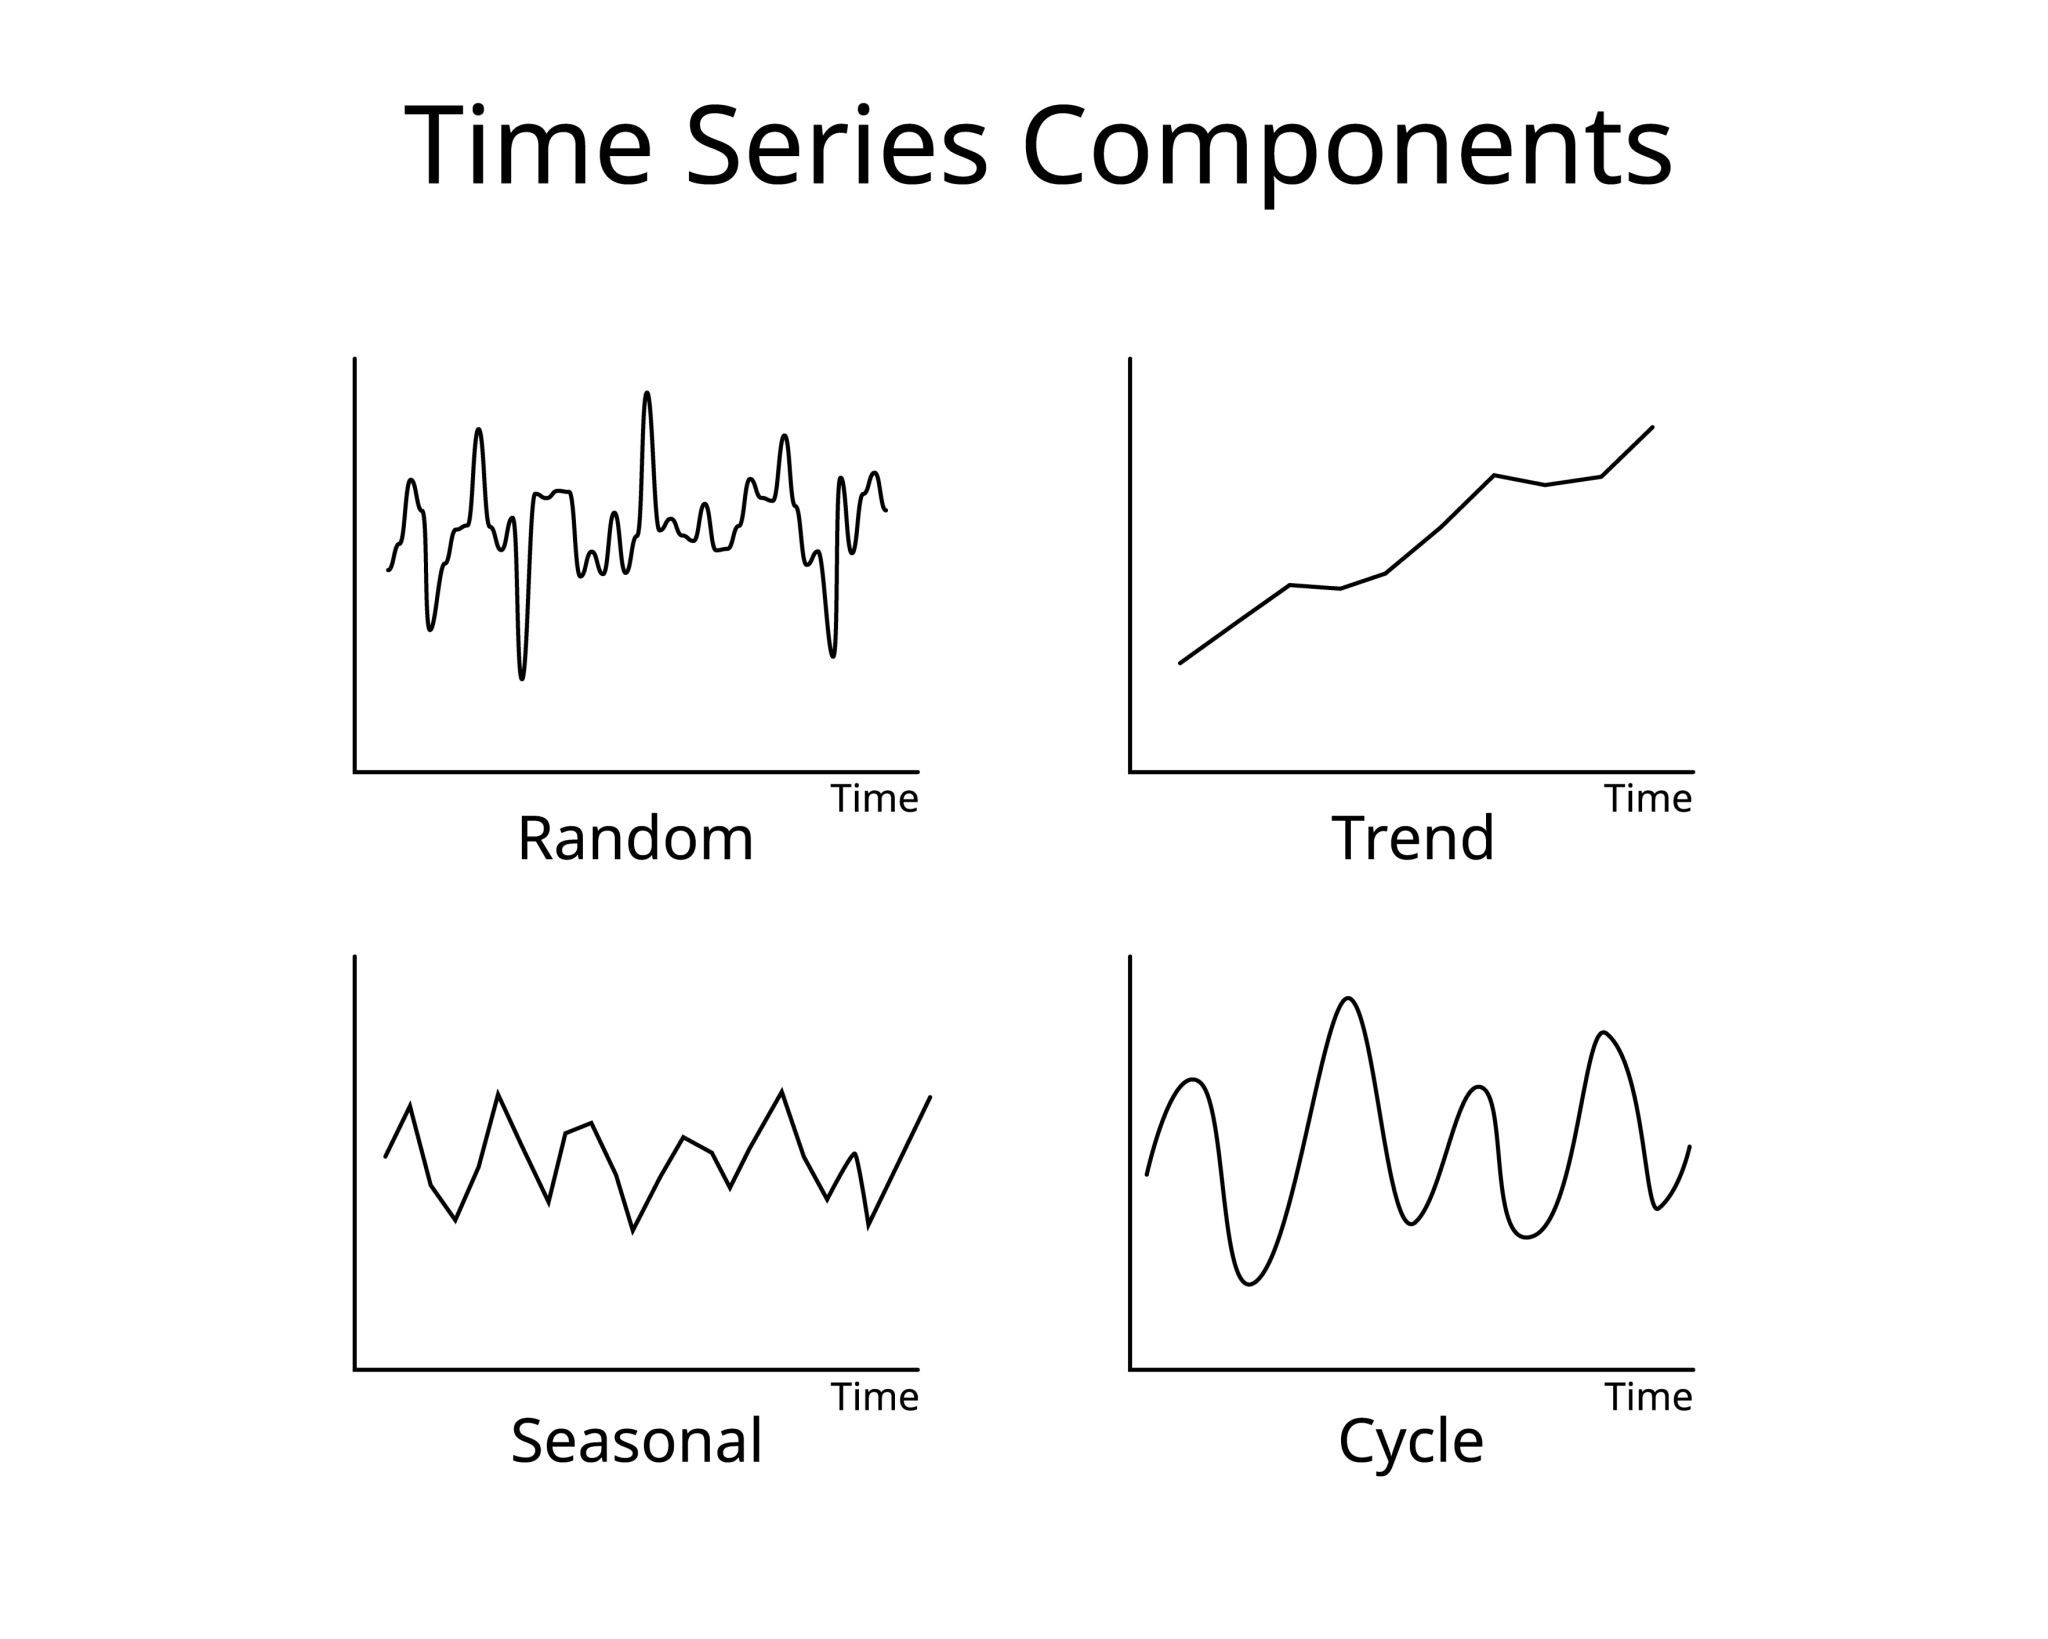
- 요소 분해의 목적: 각 요소를 분리하여 패턴을 명확히 이해하고, 예측/이상 탐지 등의 분석 작업을 정교하게 수행하기 위함.
- 가법 모형:각 변동 요인들이 독립적으로 더해지며, 시계열 전체에서 계절성의 진폭이 일정할 때 적합.
- 승법 모형:로그 변환을 통해 가법 형태로 만들 수 있으며, 추세가 커질수록 계절성이나 불규칙성의 효과도 비례하여 커지는 등 진폭이 시간에 따라 달라질 때 적합.
- STL vs. seasonal_decompose: STL은 LOESS 회귀 기반으로 시간에 따라 변하는 계절성과 이상치 영향을 덜 받으며 데이터 손실이 없다는 장점. seasonal_decompose는 이동평균 기반으로 고정된 계절성만 반영.

># 3. 정상성 판단

>>## (1) 정상성 정의
- 정상성은 시계열 데이터가 평균, 분산 등의 통계적 특성이 시간에 따라 일정한 수준으로 유지되는 성질. 정상성을 띠는 시계열을 정상 시계열이라 함. 대부분의 통계적 시계열 모델은 정상 시계열을 대상으로 함. 
- 강한 정상성: 모든 적률(평균, 분산, 왜도, 첨도)이 시간과 무관하게 일정한 경우. 현실에서 찾아보기 매우 어려움.
- 약한 정상성: 통상적으로 시계열 분석에서 '정상성'이라 부르는 개념으로, 다음 세 가지 조건을 모두 만족해야함. 
    1. 평균이 일정
    2. 분산이 일정
    자기공분산이 시차에만 의존
- 검정을 통한 정상성 판단
- 시각적 판단의 불확실성을 해소하고 객관적인 판단을 위해 검정을 사용. 대부분의 정상성 검정은 단위근검정.
- 단위근의 시계열적 의미: 시계열 모델의 특성방정식에서 근이 1인 경우를 의미하며, 비정상 시계열을 뜻함.
- 영구적인 충격: 단위근이 있으면 시계열이 랜덤워크처럼 움직여 과거의 충격이 영원히 누적되어 남게 되며, 평균으로 돌아오지 않고 분산이 계속 커지게 됨. 
- 대표적인 단위근 검정 방법
- ADF 검정:
    - 귀무가설: 시계열에 단위근이 존재한다 (비정상 시계열).
    - p-value가 유의수준보다 작으면 귀무가설 기각. 정상 시계열.
- KPSS 검정:
- 귀무가설: 시계열에 단위근이 존재하지 않는다 (정상 시계열). ADF와 귀무가설이 반대
- p-value가 유의수준보다 작으면 귀무가설 기각. 비정상 시계열.
- 확정적 추세 vs. 확률적 추세: 확정적 추세가 존재하는 경우, ADF와 KPSS의 결론이 다르게 나올 수 있음. 이 경우 ADF 또는 KPSS 모델처럼 추세항을 추가하여 추세 효과를 분리해야 함.

>>## (2) 정상성 확보를 위한 방법들

- 비정상 시계열은 추세 제거, 계절성 제거, 분산 안정화를 통해 정상 시계열로 변환할 수 있음.
1. 추세 제거
    -차분: 연이은 관측값들의 차이를 계산하여 평균의 정상성을 확보하는 방법.
        -1차 차분:  추세를 제거하는 데 사용되며, 대부분 1차 차분만으로 정상성이 확보.
        - 역차분: 차분된 데이터에 이전 시점 값을 더해 원래 단위로 복원하는 과정. 분석 후 해석을 위해 필요.
2. 계절성 제거
    - 계절 차분: 계절적 패턴을 제거하며, 계절성이 강한 데이터에 1차 차분보다 먼저 적용할 수 있음.
3. 분산 안정화
    - 로그변환: 시계열의 변동 폭이 점점 커지거나 작아질 때 적용하여 분산의 정상성을 확보. 로그를 취하면 변화폭이 줄어들고 비율적인 변화를 강조하는 효과가 있음.